# Predicting Customer Churn
## Using a Random Forest Classifier

### About the Data

### Data Preprocessing and Setup

In [2]:
%pip install pandas scikit-learn matplotlib

  Using cached pandas-2.3.3-cp39-cp39-macosx_11_0_arm64.whl (10.8 MB)
     |████████████████████████████████| 11.1 MB 759 kB/s eta 0:00:01    |███▌                            | 1.2 MB 2.1 MB/s eta 0:00:05     |████▎                           | 1.5 MB 2.1 MB/s eta 0:00:05     |████▊                           | 1.6 MB 2.1 MB/s eta 0:00:05     |██████▎                         | 2.2 MB 2.1 MB/s eta 0:00:05     |████████▏                       | 2.8 MB 2.1 MB/s eta 0:00:04     |████████▋                       | 3.0 MB 2.1 MB/s eta 0:00:04     |█████████▏                      | 3.2 MB 2.3 MB/s eta 0:00:04     |████████████████▍               | 5.7 MB 3.1 MB/s eta 0:00:02     |██████████████████▍             | 6.4 MB 3.1 MB/s eta 0:00:02     |██████████████████████          | 7.6 MB 3.1 MB/s eta 0:00:02     |███████████████████████▌        | 8.2 MB 759 kB/s eta 0:00:04     |████████████████████████        | 8.3 MB 759 kB/s eta 0:00:04     |████████████████████████▎       | 8.5 MB 759 kB/s eta

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV 
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('E Commerce Dataset.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [10]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [11]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [12]:
df["Churn"]

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn, Length: 5630, dtype: int64

In [ ]:
df = df.dropna()
#Drop all null values from the dataset
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [17]:
# Handle categorical variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160
3,50004,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134
5,50006,1,0.0,0,1,22.0,4,0,3.0,5,4,5,2,2,1,22.0,4.0,6.0,7.0,139
11,50012,1,11.0,1,1,6.0,4,1,3.0,4,0,3,2,10,1,13.0,0.0,1.0,0.0,154
12,50013,1,0.0,2,1,11.0,1,1,2.0,3,3,3,2,2,1,13.0,2.0,2.0,2.0,134


In [19]:
# Split the data into features and target variable
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Constructing a Random Forest Classifier

In [20]:
# Initiate a model instance

rf = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
    }

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

Now we have the optimal parameters for the forest and have fit the model with those parameters: 

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)
#With the best hyperparameters, we get an accuray of 0.96

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
0.961246197269722


### Find feature importance

In [26]:
for name, score in zip(X.columns, grid_search.best_estimator_.feature_importances_):
    print(f"{score:.2%}", ":", name)

25.59% : Tenure
2.66% : PreferredLoginDevice
2.19% : CityTier
7.91% : WarehouseToHome
3.83% : PreferredPaymentMode
1.64% : Gender
1.88% : HourSpendOnApp
3.88% : NumberOfDeviceRegistered
3.94% : PreferedOrderCat
5.00% : SatisfactionScore
3.42% : MaritalStatus
6.65% : NumberOfAddress
5.64% : Complain
5.79% : OrderAmountHikeFromlastYear
2.55% : CouponUsed
3.16% : OrderCount
6.65% : DaySinceLastOrder
7.63% : CashbackAmount


It looks like Tenure significantly contributes to churn

### Visualizing Model Performance

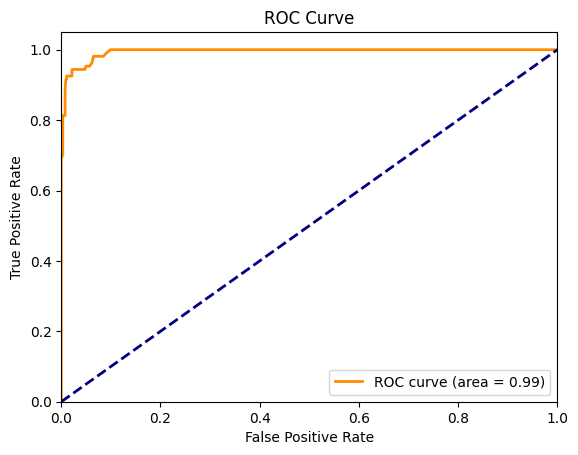

In [29]:
# Plotting the area under the curve (AUC) for ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_probs = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

The AUC value of 0.99 indicates excellent model performance. The random forest ensemble classifier has a near perfect distinction between the two possible outcomes: churn and no churn.